In [52]:
'''imports'''
import pandas as pd
import os
import numpy as np
%matplotlib inline

'''defining the database's file path'''
notebook_path = os.path.abspath("EE Graphs.ipynb")
data_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\data.csv')
rad_vel_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\rad_vel.csv')
microlensing_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\microlensing.csv')
ttv_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ttv.csv')
imaging_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\imaging.csv')
transit_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\transit.csv')
transit_csv_condensed = os.path.join(os.path.dirname(notebook_path), 'Data Files\\transit_csv_condensed.csv')

'''formatting the csv file for pandas DataFrame'''
table = pd.read_csv(data_csv)

'''see what the discovery method options are'''
s = set([])
for line in table.sy_pnum: s.add(line)
print(s)

[sum(element for element in table.pl_bmassj)]

{1, 2, 3, 4, 5, 6, 7, 8}


[nan]

In [53]:
'''
Given: Discovery Method = Radial Velocity
Generated: Eccentricity, Mass (Relative to Earth), Mass (Relative to Jupiter), Density, Distance (From Star)
'''

with open(rad_vel_csv,'w') as f1:
        [f1.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmasse)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].pl_dens)+","
                  +str(table.loc[i].sy_dist)+"\n")
         for i,line in enumerate(table.discoverymethod)if line=="Radial Velocity" and table.loc[i].sy_pnum==1]

rad_vel_table = pd.read_csv(rad_vel_csv, names=['eccentricity','mass_e','mass_j','density','dist'])
sample_size = rad_vel_table.index.stop
print(sample_size)

341


Text(0, 0.5, 'Orbital Eccentricity')

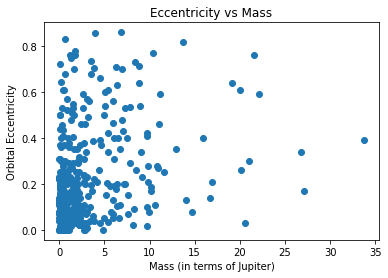

In [85]:
        '''Graphing'''
import matplotlib.pyplot as plt
# mass_jupiter = plt.scatter(rad_vel_table.eccentricity, rad_vel_table.mass_j, marker='.',color='purple',label="Mass")
# density = plt.scatter(rad_vel_table.eccentricity,rad_vel_table.density,marker='.',color='orange',label="Density")
# legend = plt.legend(handles=[mass_jupiter,density],loc='upper right')
# plt.title("Mass and Density vs Eccentricity")
# plt.xlabel("Orbital Eccentricity")


mass_jupiter = plt.scatter(rad_vel_table.mass_j, rad_vel_table.eccentricity)
plt.title("Eccentricity vs Mass")
plt.xlabel("Mass (in terms of Jupiter)")
plt.ylabel("Orbital Eccentricity")


Text(0, 0.5, 'Density')

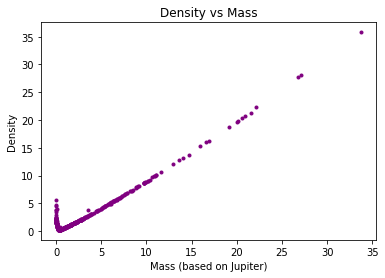

In [55]:
        '''Graphing'''
import matplotlib.pyplot as plt
plt.scatter(rad_vel_table.mass_j, rad_vel_table.density, marker='.',color='purple')
plt.title("Density vs Mass")
plt.xlabel("Mass (based on Jupiter)")
plt.ylabel("Density")

Text(0.5, 0, 'Density')

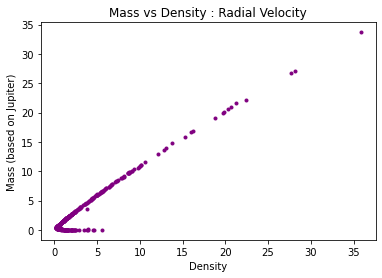

In [56]:
        '''Graphing'''
import matplotlib.pyplot as plt
plt.scatter(rad_vel_table.density,rad_vel_table.mass_j, marker='.',color='purple')
plt.title("Mass vs Density : Radial Velocity")
plt.ylabel("Mass (based on Jupiter)")
plt.xlabel("Density")

Text(0, 0.5, 'Eccentricity')

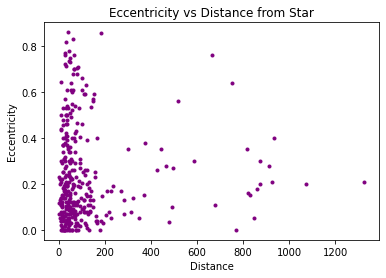

In [57]:
        '''Graphing'''
import matplotlib.pyplot as plt
plt.scatter(rad_vel_table.dist,rad_vel_table.eccentricity, marker='.',color='purple')
plt.title("Eccentricity vs Distance from Star")
plt.xlabel("Distance")
plt.ylabel("Eccentricity")

Text(0, 0.5, 'Mass')

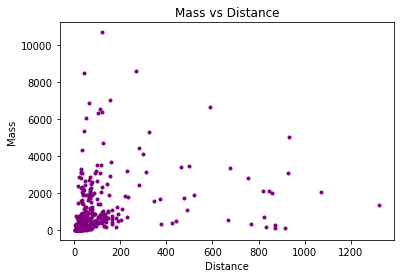

In [58]:
        '''Graphing'''
import matplotlib.pyplot as plt
plt.scatter(rad_vel_table.dist, rad_vel_table.mass_e, marker='.',color='purple')
plt.title("Mass vs Distance")
plt.xlabel("Distance")
plt.ylabel("Mass")

In [59]:
'''
Given: Discovery Method = Imaging
Generated: Eccentricity, Mass (Relative to Earth), Mass (Relative to Jupiter), Density, Distance (From Star)
'''
with open(imaging_csv,'w') as f3:
        [f3.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmasse)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].pl_dens)+","
                  +str(table.loc[i].sy_dist)+"\n")for i,line in enumerate(table.discoverymethod)if line=="Imaging"]
        
imaging_table = pd.read_csv(imaging_csv, names=['eccentricity','mass_e','mass_j','density','dist'])
sample_size = imaging_table.index.stop
print(sample_size)

43


Text(0, 0.5, 'Log of mass/density')

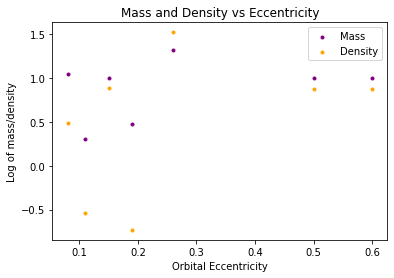

In [60]:
        '''Graphing'''
import math
import matplotlib.pyplot as plt
mass_jupiter = plt.scatter(imaging_table.eccentricity, [math.log10(m) for m in imaging_table.mass_j], marker='.',color='purple',label="Mass")
density = plt.scatter(imaging_table.eccentricity, [math.log10(d) for d in imaging_table.density],marker='.',color='orange',label="Density")
legend = plt.legend(handles=[mass_jupiter,density],loc='upper right')
plt.title("Mass and Density vs Eccentricity")
plt.xlabel("Orbital Eccentricity")
plt.ylabel("Log of mass/density")

Text(0, 0.5, 'Density')

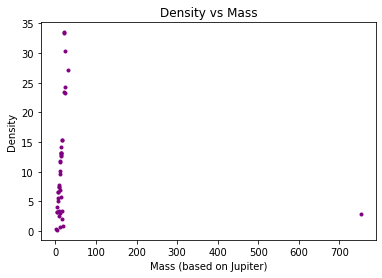

In [61]:
        '''Graphing'''
import matplotlib.pyplot as plt
plt.scatter(imaging_table.mass_j, imaging_table.density, marker='.',color='purple')
plt.title("Density vs Mass")
plt.xlabel("Mass (based on Jupiter)")
plt.ylabel("Density")

Text(0.5, 0, 'Density')

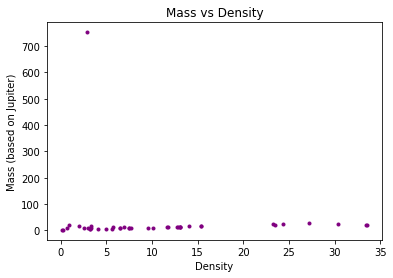

In [62]:
        '''Graphing'''
import matplotlib.pyplot as plt
plt.scatter(imaging_table.density,imaging_table.mass_j, marker='.',color='purple')
plt.title("Mass vs Density")
plt.ylabel("Mass (based on Jupiter)")
plt.xlabel("Density")

Text(0, 0.5, 'Eccentricity')

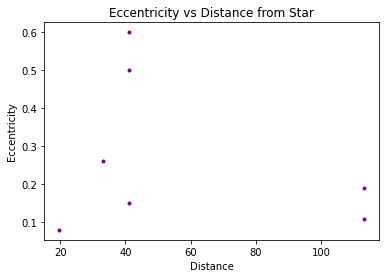

In [63]:
        '''Graphing'''
import matplotlib.pyplot as plt
plt.scatter(imaging_table.dist,imaging_table.eccentricity, marker='.',color='purple')
plt.title("Eccentricity vs Distance from Star")
plt.xlabel("Distance")
plt.ylabel("Eccentricity")

Text(0, 0.5, 'Mass')

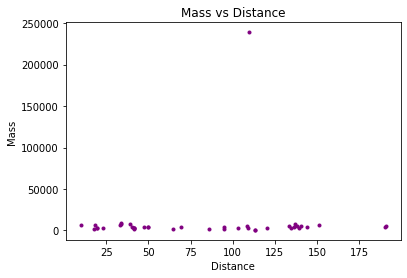

In [64]:
        '''Graphing'''
import matplotlib.pyplot as plt
plt.scatter(imaging_table.dist, imaging_table.mass_e, marker='.',color='purple')
plt.title("Mass vs Distance")
plt.xlabel("Distance")
plt.ylabel("Mass")

In [68]:
'''
Given: Discovery Method = Transit
Generated: Eccentricity, Mass (Relative to Earth), Mass (Relative to Jupiter), Density, Distance (From Star)
'''
with open(transit_csv,'w') as f4:
        [f4.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmasse)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].pl_dens)+","
                  +str(table.loc[i].sy_dist)+"\n")for i,line in enumerate(table.discoverymethod)if line=="Transit"]
        
transit_table = pd.read_csv(transit_csv, names=['eccentricity','mass_e','mass_j','density','dist'])
sample_size = transit_table.index.stop
print(sample_size)

3067


Text(0.5, 0, 'Mass (jupiter)')

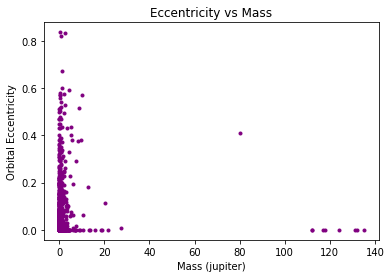

In [84]:
        '''Graphing'''
import matplotlib.pyplot as plt

'''includes outliers (all data points)'''

mass_jupiter = plt.scatter(transit_table.mass_j, transit_table.eccentricity, marker='.',color='purple',label="Mass")
# density = plt.scatter(transit_table.eccentricity,transit_table.density,marker='.',color='orange',label="Density")
# legend = plt.legend(handles=[mass_jupiter,density],loc='upper right')
plt.title("Eccentricity vs Mass")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (jupiter)")

213


Text(0.5, 0, 'Mass (jupiter)')

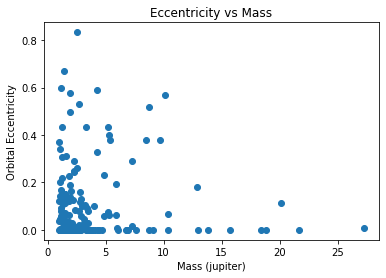

In [83]:
        '''Graphing'''
import matplotlib.pyplot as plt

'''exclude outliers to see the tightly packed distribution around'''

with open(transit_csv_condensed,'w') as f5:
                [f5.write(str(transit_table.loc[i].eccentricity)+","
                  +str(transit_table.loc[i].mass_e)+","
                  +str(transit_table.loc[i].mass_j)+","
                  +str(transit_table.loc[i].density)+","
                  +str(transit_table.loc[i].dist)+"\n")
                  for i,line in enumerate(transit_table.mass_j)if float(line)<40 and float(line)>1]
        
transit_table_condensed = pd.read_csv(transit_csv_condensed, names=['eccentricity','mass_e','mass_j','density','dist'])
sample_size = transit_table_condensed.index.stop
print(sample_size)

mass_jupiter = plt.scatter(transit_table_condensed.mass_j, transit_table_condensed.eccentricity)
plt.title("Eccentricity vs Mass")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (jupiter)")

In [ ]:
        '''Graphing'''
import matplotlib.pyplot as plt
plt.scatter(transit_table.mass_j, transit_table.density, marker='.',color='purple')
plt.title("Density vs Mass")
plt.xlabel("Mass (based on Jupiter)")
plt.ylabel("Density")

In [ ]:
        '''Graphing'''
import matplotlib.pyplot as plt
plt.scatter(transit_table.density,transit_table.mass_j, marker='.',color='purple')
plt.title("Mass vs Density")
plt.ylabel("Mass (based on Jupiter)")
plt.xlabel("Density")

In [ ]:
        '''Graphing'''
import matplotlib.pyplot as plt
plt.scatter(transit_table.dist,transit_table.eccentricity, marker='.',color='purple')
plt.title("Eccentricity vs Distance from Star")
plt.xlabel("Distance")
plt.ylabel("Eccentricity")

Text(0, 0.5, 'Mass')

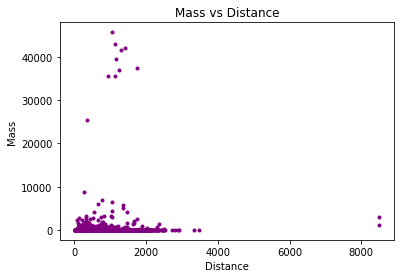

In [47]:
        '''Graphing'''
import matplotlib.pyplot as plt
plt.scatter(transit_table.dist, transit_table.mass_e, marker='.',color='purple')
plt.title("Mass vs Distance")
plt.xlabel("Distance")
plt.ylabel("Mass")

In [6]:
import pandas as pd
import os
import numpy as np

notebook_path = os.path.abspath("EE Graphs.ipynb")
data_extd_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\data_extended.csv')

'''formatting the csv file for pandas DataFrame'''
table_extd = pd.read_csv(data_extd_csv)

'''see what the discovery method options are'''
s = set([])
for line in table_extd.pl_name: s.add(line)
print(len(s))
print(len(table_extd.pl_name))

2236
14000


8
8


Text(0, 0.5, 'Orbital Eccentricity')

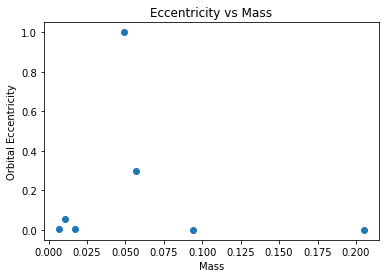

In [15]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

notebook_path = os.path.abspath("EE Graphs.ipynb")
data_extd_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\our_system.csv')

'''formatting the csv file for pandas DataFrame'''
ctable = pd.read_csv(data_extd_csv)

'''see what the discovery method options are'''
s = set([])
for line in ctable.planet_name: s.add(line)
print(len(s))
print(len(ctable.planet_name))

# plt.scatter(ctable.eccentricity, ctable.density)
plt.scatter(ctable.eccentricity,ctable.mass_j)
plt.title("Eccentricity vs Mass")
plt.xlabel("Mass")
plt.ylabel("Orbital Eccentricity")